In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/coldWave.csv'
pd.read_csv(file_path, encoding='euc-kr') 
# 파일에 한글이 들어가있는 경우 encoding='cp949' 또는 encoding='euc-kr 를 해줘야함 안해주면 오류남 

,일시,지점,일최저체감온도,일최고기온,일평균기온,일최저기온,일평균상대습도,일평균풍속,일최대풍속,한파특보
0,2021-12-01,서울(108),-9.5,1.5,-1.3,-3.0,51.8,4.2,7.2,X
1,2021-12-01,인천(112),-8.8,1.1,-0.7,-1.8,43.5,6.8,12.3,X
2,2021-12-01,대전(133),-4.6,3.8,0.9,-2.6,59.9,2.8,5.3,X
3,2021-12-01,대구(143),-5.8,4.8,2.4,-0.5,39.6,6.3,9.8,X
4,2021-12-01,광주(156),-3.6,5.0,2.4,0.1,81.1,1.7,3.4,X
...,...,...,...,...,...,...,...,...,...,...
121,2021-12-21,인천(112),-4.1,7.5,5.2,1.0,69.5,3.0,5.7,X
122,2021-12-21,대전(133),0.3,14.1,7.9,1.7,72.9,1.4,3.2,X
123,2021-12-21,대구(143),-0.4,14.2,6.3,-0.6,67.5,1.0,3.3,X
124,2021-12-21,광주(156),2.4,14.1,7.0,2.4,82.9,0.7,2.4,X


In [2]:
coldWave = pd.read_csv(file_path, encoding='euc-kr')
print(coldWave.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   일시       126 non-null    object 
 1   지점       126 non-null    object 
 2   일최저체감온도  125 non-null    float64
 3   일최고기온    126 non-null    float64
 4   일평균기온    126 non-null    float64
 5   일최저기온    126 non-null    float64
 6   일평균상대습도  126 non-null    float64
 7   일평균풍속    126 non-null    float64
 8   일최대풍속    126 non-null    float64
 9   한파특보     126 non-null    object 
dtypes: float64(7), object(3)
memory usage: 10.0+ KB
None


In [3]:
#지점별 평균 
coldWave.groupby('지점').mean()

,일최저체감온도,일최고기온,일평균기온,일최저기온,일평균상대습도,일평균풍속,일최대풍속
지점,,,,,,,
광주(156),-0.647619,10.733333,5.438095,1.257143,75.047619,1.080952,2.942857
대구(143),-4.028571,10.338095,4.423810,-0.985714,60.347619,2.266667,5.000000
대전(133),-3.528571,9.252381,3.647619,-1.390476,73.880952,1.309524,3.357143
부산(159),-1.170000,12.090476,7.361905,3.180952,54.319048,2.933333,6.557143
서울(108),-5.223810,7.366667,2.819048,-1.266667,64.861905,2.204762,4.414286
인천(112),-4.780952,7.580952,3.609524,-0.066667,56.590476,3.242857,6.690476


In [4]:
df=coldWave.groupby('지점').mean()

[인사이트 도출 1: 지점별 일평균기온의 평균보다 낮은 지역] 

In [5]:
# 전체 일평균기온의 평균보다 낮은 일평균기온을 기록한 지점
전체일평균 = coldWave.일평균기온.mean()

# 지점별 일평균기온의 평균
지점일평균 = coldWave.groupby('지점')['일평균기온'].mean()
일평균이하 = 지점일평균[지점일평균 <= 전체일평균].index.tolist()
print(일평균이하)

['대구(143)', '대전(133)', '서울(108)', '인천(112)']


[# 지점별 일평균기온의 평균 시각화 그래프 1]

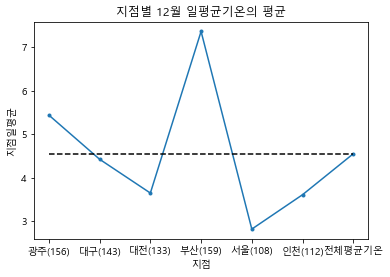

In [22]:
지점수 = 지점일평균.index.tolist()
지점수.append('전체평균기온')
지점수

지점전체일평균 = 지점일평균.tolist()
지점전체일평균.append(전체일평균) #지점별 일평균기온의 평균 리스트 마지막에 전체 평균을 추가 
지점전체일평균

plt.rc('font', family='Malgun Gothic')


x_pos = np.arange(len(지점수))
plt.plot(x_pos, 지점전체일평균,marker='o', ms=3)
plt.ylabel('지점일평균') # y축 이름
plt.xlabel('지점') #x축 이름
plt.title('지점별 12월 일평균기온의 평균')  # 말그대로 타이틀

plt.plot([0, 6], [전체일평균, 전체일평균],'k--') #평균 수치 선을 생성해줌
plt.xticks(x_pos, 지점수)


plt.show()

[인사이트 도출 2 : 일최저체감온도 지점별 평균과 순위]

In [7]:
# 지점별 일최저체감온도의 평균
일최저체감온도평균 = coldWave.groupby('지점')['일최저체감온도'].mean()
print(일최저체감온도평균)

지점
광주(156)   -0.647619
대구(143)   -4.028571
대전(133)   -3.528571
부산(159)   -1.170000
서울(108)   -5.223810
인천(112)   -4.780952
Name: 일최저체감온도, dtype: float64


In [8]:
df1 = pd.DataFrame(
    {'지점': 일최저체감온도평균.index.tolist(),
     '평균온도': 일최저체감온도평균.values.tolist()})
df1

,지점,평균온도
0,광주(156),-0.647619
1,대구(143),-4.028571
2,대전(133),-3.528571
3,부산(159),-1.170000
4,서울(108),-5.223810
5,인천(112),-4.780952


In [9]:
df1['순위'] = df1['평균온도'].rank(ascending=False)
df1['순위'] = df1['순위'].astype(int)
순위1=df1.sort_values(by='순위')
print(순위1)

        지점      평균온도  순위
0  광주(156) -0.647619   1
3  부산(159) -1.170000   2
2  대전(133) -3.528571   3
1  대구(143) -4.028571   4
5  인천(112) -4.780952   5
4  서울(108) -5.223810   6


[인사이트 도출 3 : 지점별 일교차와 순위]

In [10]:
일교차 = df['일최고기온'] - df['일최저기온']

In [11]:
df2 = pd.DataFrame(
    {'지점': 일교차.index.tolist(),
     '일교차': 일교차.values.tolist()})
df2

,지점,일교차
0,광주(156),9.476190
1,대구(143),11.323810
2,대전(133),10.642857
3,부산(159),8.909524
4,서울(108),8.633333
5,인천(112),7.647619


In [12]:
df2['순위'] = df2['일교차'].rank(ascending=False)
df2['순위'] = df2['순위'].astype(int)
순위2=df2.sort_values(by='순위')
print(순위2)

        지점        일교차  순위
1  대구(143)  11.323810   1
2  대전(133)  10.642857   2
0  광주(156)   9.476190   3
3  부산(159)   8.909524   4
4  서울(108)   8.633333   5
5  인천(112)   7.647619   6


[#지점별 일최고기온과 일최저기온 그리고 일교차 시각화 그래프 2]

In [13]:
df3 = pd.DataFrame(
    {'지점': 일교차.index.tolist(),
     '일교차': 일교차.values.tolist(),
     '일최고기온': df['일최고기온'].values.tolist(),
     '일최저기온': df['일최저기온'].values.tolist()})
df3

,지점,일교차,일최고기온,일최저기온
0,광주(156),9.476190,10.733333,1.257143
1,대구(143),11.323810,10.338095,-0.985714
2,대전(133),10.642857,9.252381,-1.390476
3,부산(159),8.909524,12.090476,3.180952
4,서울(108),8.633333,7.366667,-1.266667
5,인천(112),7.647619,7.580952,-0.066667


D:\LKM\anaconda\envs\pybook\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


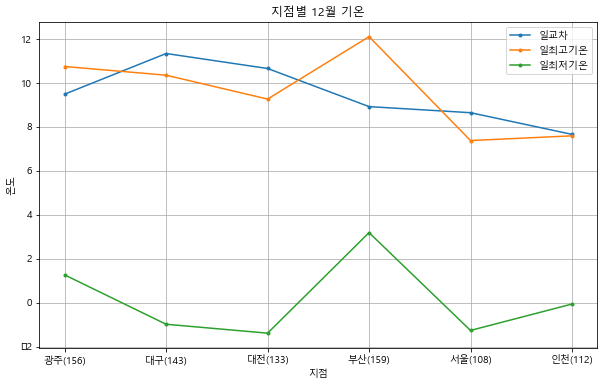

In [24]:
%matplotlib inline 


df3.plot('지점', y=['일교차', '일최고기온','일최저기온'],
         figsize=(10, 6),
         grid=True,
         marker='o', 
         ms=3)

plt.ylabel('온도') 
plt.xlabel('지점') 
plt.title('지점별 12월 기온') 

plt.show()

[인사이트 도출 4 : 일최대풍속 평균과 평균보다 높은 지점]

In [27]:
전체풍속평균 = coldWave.일최대풍속.mean()
print(전체풍속평균)

지점풍속평균 = coldWave.groupby('지점')['일최대풍속'].mean()
풍속평균이상 = 지점풍속평균[지점풍속평균 >= 전체풍속평균].index.tolist()
print(풍속평균이상)

4.826984126984127
['대구(143)', '부산(159)', '인천(112)']


[인사이트 도출 5 : 일평균상대습도 평균과 평귬보다 높은 지점]

In [26]:
전체습도평균 = coldWave.일평균상대습도.mean()
print(전체습도평균)

지점습도평균 = coldWave.groupby('지점')['일평균상대습도'].mean()
습도평균이상 = 지점습도평균[지점습도평균 >= 전체습도평균].index.tolist()
print(습도평균이상)

64.17460317460316
['광주(156)', '대전(133)', '서울(108)']
